In [10]:
from cellmask_model import CellMaskModel
import os
import cellmask_model
import importlib
importlib.reload(cellmask_model)
from cellmask_model import CellMaskModel, dice_evaluate



#first_path = os.getcwd() + '/saved_model/cp_model'
#second_path = os.getcwd() + '/saved_model/mask_model'
#model.import_model(first_path_new_mode,second_path)




#(img, mask) = model.testLoader_img(0)



#images = np.array(images)

In [11]:
images_path = os.getcwd() + '/812_plate/'
model = CellMaskModel(device="cuda:0")

In [14]:
images_path = os.getcwd() + '/812_plate/'
model = CellMaskModel(device="cuda:0")
model.get_data(images_path)
first_path_new_model = os.getcwd() + '/saved_model/cp_model_2'
second_path_new_model = os.getcwd() + '/saved_model/mask_model_2'

importing images
(5, 1080, 1080, 4)
(5, 1080, 1080, 4)
imported images successfully
getting model
got model
getting data
got data


In [8]:
model.train_models(20)
model.save_model(first_path_new_model, second_path_new_model)

[INFO] training the network...
num epochs: 20 <class 'int'>
learning rate: 0.001
loss: mse
training images: 668
testing images: 329
[INFO] EPOCH: 1/20  Train loss: 0.002541  Test loss: 0.002358  Time taken: 17s  Remaining time: 326s
[INFO] EPOCH: 2/20  Train loss: 0.002450  Test loss: 0.002457  Train loss change: -0.01  Test loss change: 0.06  Time taken: 16s  Remaining time: 293s
[INFO] EPOCH: 3/20  Train loss: 0.002383  Test loss: 0.003094  Train loss change: 0.01  Test loss change: -0.02  Time taken: 16s  Remaining time: 278s
[INFO] EPOCH: 4/20  Train loss: 0.002268  Test loss: 0.002238  Train loss change: 0.03  Test loss change: -0.03  Time taken: 17s  Remaining time: 269s
[INFO] EPOCH: 5/20  Train loss: 0.002171  Test loss: 0.002067  Train loss change: -0.03  Test loss change: 0.09  Time taken: 17s  Remaining time: 253s
[INFO] EPOCH: 6/20  Train loss: 0.002047  Test loss: 0.002039  Train loss change: 0.02  Test loss change: -0.02  Time taken: 17s  Remaining time: 235s
[INFO] EPOCH

In [15]:
model.import_model(first_path_new_model, second_path_new_model)

In [16]:
print(dice_evaluate(model))

im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)
im1 shape: (5, 256, 256)
im2 shape: (5, 256, 256)


In [17]:
import numpy as np
import tifffile

def import_images(images_path,num_imgs=20):
    images = [np.squeeze(tifffile.imread(images_path + str(i) + '.tif')) for i in range(num_imgs)]
    return images

images = import_images(images_path)
imgs = [(image-np.min(image))/(np.max(image)-np.min(image)) for image in images]

True
(1080, 1080)
(1080, 1080)
im1 shape: (1080, 1080)
im2 shape: (1080, 1080)
0.9409474527197683
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
unique pred [0 1]


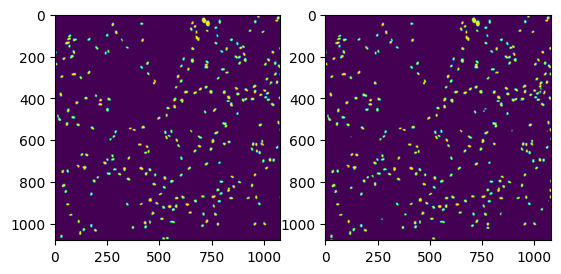

In [18]:
import matplotlib.pyplot as plt
img = imgs[2][:,:,0]
pred = model.eval(img)

from cellpose import models, core
model_cellpose = models.CellposeModel(model_type='nuclei',gpu=core.use_gpu())
cellpose_mask, _, _ = model_cellpose.eval(img,channels=[[0,0]],cellprob_threshold=False)

#plt.imshow()
#plt.show()

print(core.use_gpu())
print(np.where(cellpose_mask>0,1,0).shape)
print(pred[0].shape)
print(model.dice_coeff(np.where(cellpose_mask>0,1,0),pred[0])) #dice coeff should be between ground truth mask and prediction mask, not original image and ground truth mask
#doesn't make sense if the dice loss predicts between raw and dice loss
pred_0 = pred[0]
print(pred_0)
print('unique pred',np.unique(pred_0))

plt.subplot(1,2,1)
plt.imshow(np.where(cellpose_mask>0,1,0))
plt.subplot(1,2,2)
plt.imshow(pred[0])
plt.show()